In [1]:
from IPython.display import Image

# CA1 - Artificial Intelligence


1	A puzzle has multiple ways of reaching the end solution. Fig. 1 shows a graph that represents all possible routes to the solution. The starting point of the game is represented by A, the solution is represented by S. The other points in the graph are possible intermediary stages.





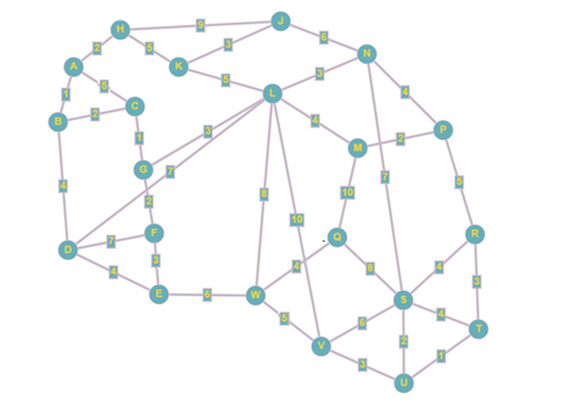

In [2]:
Image(filename="Picture1.png")

(i)	Identify the differences between a graph and a tree. [0-5]

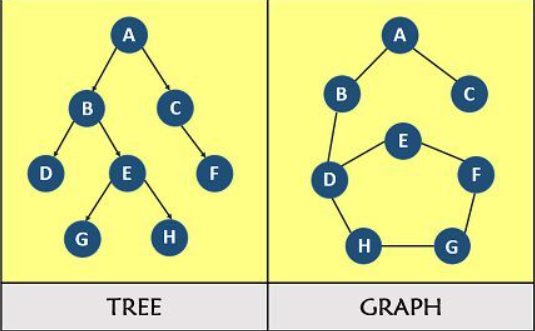

In [3]:
Image(filename="Picture2.png")

Graphs and trees are examples of non-linear data structures. Trees are a useful tool for showing the connections between nodes in a hierarchical structure, guaranteeing connectivity while preventing loops. Whereas trees put restrictions on connectivity, graphs follow a network paradigm that allows for loops and unrestricted connectivity.

Tree

•	Only one path exists between two vertices (nodes).
Trees always will start from the top to the bottom. This means that in order to reach the bottom of the tree there is just one path. If you look at the image above, there is only one path to go from A to G or H.

•	Tree doesn´t have loops.
Following the same approach of the example above, because of the root concept used on Trees as the connections between the vertices are always pointing down, once the next stage(node) is chosen, you can´t go back.

•	Number of edges is “n – 1” (n = nodes).
Each node on the Tree has only one connection with the next node. By saying that, the numbers of edges will always be the numbers of nodes minus 1 (n-1)


Graph

•	More than one path is allowed between two vertices.
Graphs allow you to go to H or G in many different ways and directions. Moreover, it is not mandatory starting from A. Graph does not have a concept of a root.

•	There can be loop in graphs.
In order to find the better(cheaper) path from one point to other, graphs are allowed to have loops and move back to the top or sides. A good example using the image above is: Starting from A and finishing on G, the chosen path could be A,B,D,H,G or A,B,D,E,F,G. The result will be chosen based on the value of the distance between each node.

•	Number of edges are not defined.
Using the opposite concept of Tree, Graphs can (and will most of the times) have one node connected to more the one node. In the image above, node D is connected to B, E and H.


(ii)	Explain in detail how the graph is an abstraction of the problem. [0-5]

The concept of graph abstraction originated in the 18th century with graph theory. It all began when a tourist aimed to traverse all seven bridges in the city of Königsberg (now Kaliningrad, Russia) without reapeting any steps.

Ultimately, it was determined to be impossible because each landmass (nodes or vertices) connected by the seven bridges had an odd number of bridges (edges) linked to them. This led to the conclusion that, for a solution to exist, the graph must either have zero or two vertices with an odd degree (an odd number of edges connected to them).

The study of graphs, which are mathematical structures built up of vertices and edges that link pairs of vertices. Graphs are a useful tool for modeling and evaluating real-world systems because they can be used to show complex connections and relationships between data points. Over the years, problem-solving methodologies evolved, shifting from mere measurement or calculation to identifying relationships between objects. In this context, graph theory proved valuable not only from a mathematical perspective but also in addressing real-life problems. It found applications in diverse fields such as biology, linguistics, and social science.

(iii)	Identify the advantages of using a visualisation such as the one shown in Fig. 1. [0-5]

Interactions between various graph parts may be represented in an easy-to-understand way through the use of visualizations. It helps users in recognizing the relationships and structures between various stages.
The graphical representation makes possible to quickly examine several routes and paths that go from the beginning point (A) to the solution (S). This is very helpful when assessing how effective or ideal certain techniques are.
The graph allows an easy observation and comparison of alternate routes when there are several ways to arrive at the solution. It also makes it possible to explore different outputs with other combinations or techniques.


(b)	Demonstrate how Dijkstra’s algorithm would find the shortest path to the solution in Fig.1 through diagrams and written explanation of each stage. [0-25]

In [4]:
example_graph = {
    'A': {'B': 1, 'C': 5, 'H': 2},
    'B': {'A': 1, 'C': 2, 'D': 4},
    'C': {'A': 5, 'B': 2, 'G': 1},
    'D': {'B': 4, 'L' : 7, 'F': 7, 'E': 4},
    'E': {'D': 4, 'F': 3, 'W': 6},
    'F': {'D': 7, 'E': 3, 'G' : 2},
    'G': {'F': 2, 'C': 1, 'L' : 3},
    'H': {'A': 2, 'K':5, 'J': 9},
    'J': {'H': 9, 'K': 3, 'N': 6},
    'K': {'H': 5, 'J': 3, 'L': 5},
    'L': {'K': 5, 'N': 3, 'G': 3, 'D': 7, 'W': 8, 'V': 10,'M': 4},
    'M': {'L': 4, 'Q': 10, 'P': 2},
    'N': {'J': 6, 'L': 3, 'S': 7, 'P': 4},
    'P': {'N': 4, 'M': 2, 'R': 5},
    'Q': {'M': 10, 'W': 4, 'S': 8},
    'R': {'P': 5, 'S': 4, 'T': 3},
    'S': {'N': 7, 'Q': 8, 'R': 4, 'V': 6, 'U': 2, 'T': 4},
    'T': {'R': 3, 'S': 4, 'U': 1},
    'U': {'T': 1, 'S': 2, 'V': 3},
    'V': {'U': 3, 'S': 6, 'L': 10, 'W': 5},
    'W': {'E': 6, 'L': 8, 'Q': 4, 'V': 5},


}

In [5]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import timeit
import time



start_time_dijkstra = time.time()
def calculate_distances(graph, starting_vertex, ending_vertex):    
    distances = {vertex: float('infinity') for vertex in graph}
    distances[starting_vertex] = 0
    predecessors = {vertex: None for vertex in graph}

    pq = [(0, starting_vertex)]
    while len(pq) > 0:
        current_distance, current_vertex = heapq.heappop(pq)

        # Nodes can get added to the priority queue multiple times. We only
        # process a vertex the first time we remove it from the priority queue.
        if current_distance > distances[current_vertex]:
            continue

        # If the current vertex is the ending vertex, break out of the loop
        if current_vertex == ending_vertex:
            break

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # Only consider this new path if it's better than any path we've
            # already found.
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current_vertex  # Track the predecessor
                heapq.heappush(pq, (distance, neighbor))
    
    # Reconstruct the path from A to S
    path = []
    current_node = ending_vertex
    while current_node is not None:
        path.insert(0, current_node)
        current_node = predecessors[current_node]
    
    return distances, path
end_time_dijkstra = time.time()

The piece of code above was used in class by the lecturer David McQuaid. In order to track the shortest path from a starting point `A` to a ending point `S`, a variable `predecessors` was implemented inside the for loop to track the current vertex.

A empty list `path` is initialize to store the shortest path. A while loop was inplemented to backtrack from the end vertex ('S') to the starting vertex ('A'). Below the diagrams in the end of the code it is possible to visualize how the algorithm works, visiting each vertex and its neighbors. When there is not more vertex to visit, the algorithm stops then the while loop starts goingo backwards (that is the reason `current_node = ending_vertex`) recreating the path finding the shortest one until the `current_node` is `None`.

In [6]:
# Input the start and end vertex
starting_vertex = 'A'
ending_vertex = 'S'

distances, path = calculate_distances(example_graph, starting_vertex, ending_vertex)



I decided to use the Paint in order to measure the distances of each vertex in pixels and then create the graph.

In [7]:
# Create the graph using tuple(x,y)
node_positions = {
    'A': (89, -101),
    'B': (66, -182),
    'C': (179, -160),
    'D': (80,-371),
    'E': (213, -436),
    'F': (207, -345),
    'G': (191, -253),
    'H': (157, -47),
    'J': (392, -35),
    'K': (242, -103),
    'L': (380, -140),
    'M': (505, -221),
    'N': (520, -83),
    'P': (630, -191),
    'Q': (476, -351),
    'R': (677, -347),
    'S': (573, -443),
    'T': (682, -486),
    'U': (574, -565),
    'V': (452, -512),
    'W': (355, -437),
}


I imported the networkx library. Because the graph in question is a direct graph, the method nx.DiGraph() was used to create an example graph 'Graph' and add edges to it using the add_edges_from() method based on the tuples generated by the currend node, the neighbor node and the weight of the edge.

In [8]:
# Create a direct graph
Graph = nx.DiGraph()
for node, neighbors in example_graph.items():
    Graph.add_edges_from((node, neighbor, {'weight': weight}) for neighbor, weight in neighbors.items())

The for loop iterates over each edge in the determined shortest path (path) in this block. It extracts the weight of the edge that connects the current node to the next node in the path for each edge.

Employing the `NetworkX` library was the best opition in regards to draw the graph, as this library it is much used for machine learning programs for graphs analysis, specially in python.

`nx.draw` takes `node_positions` to draw the graph.

`nx.draw_networkx_nodes` and `nx.draw_networkx_edges` is used to highlight the current node in the path.

`nx.get_edge_attributes` is a method used to take the attribute `weight` and stores into `labels` in order to be used as a parameter in `nx.draw_networkx_edge_labe`.

The library matplotlib is used to adjust the size of the plot using `figure`, to add title using `title`, and to display the plot using `plt.show()`.

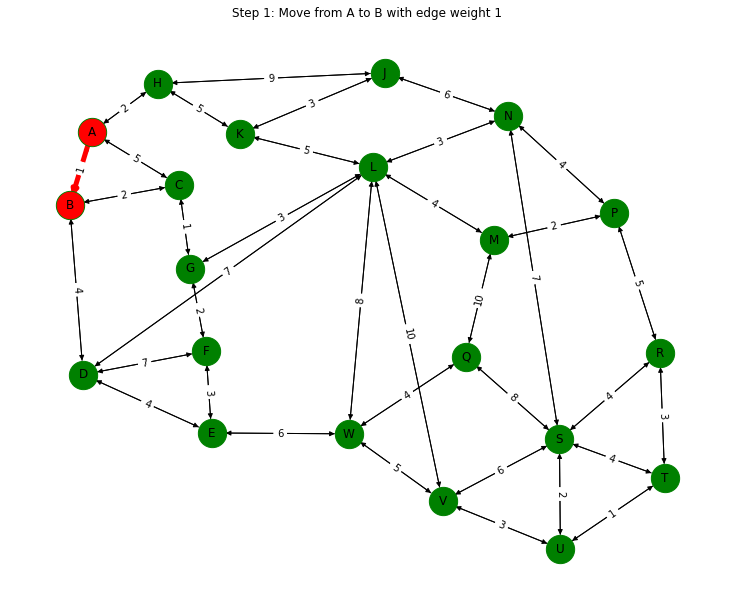

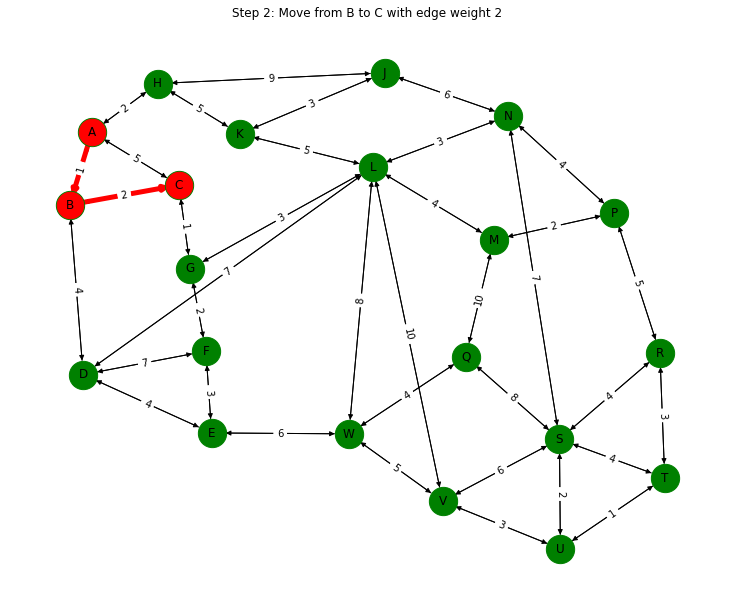

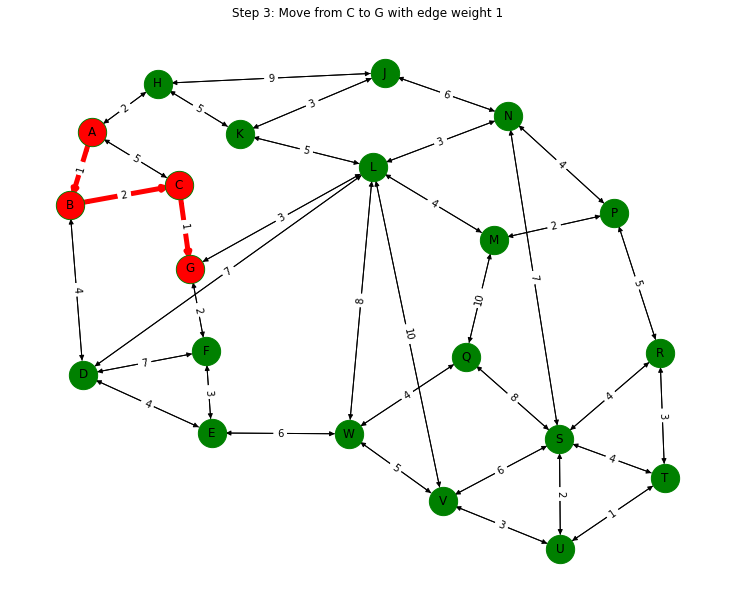

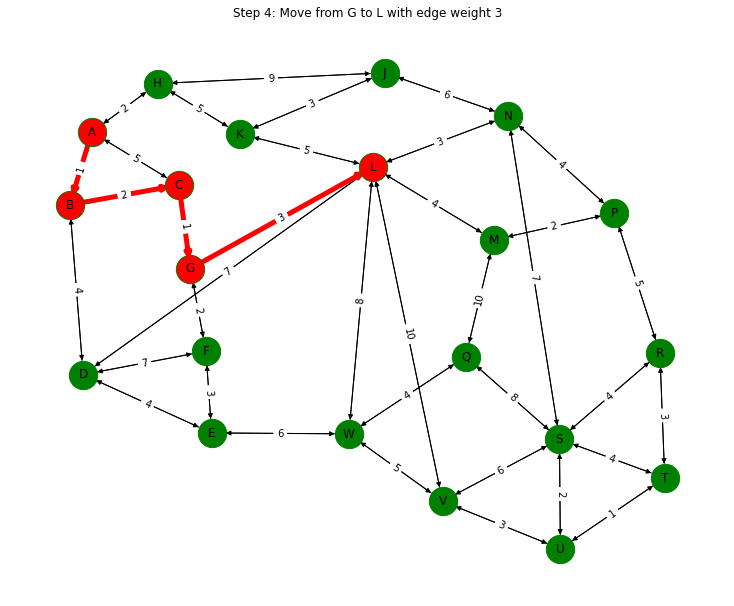

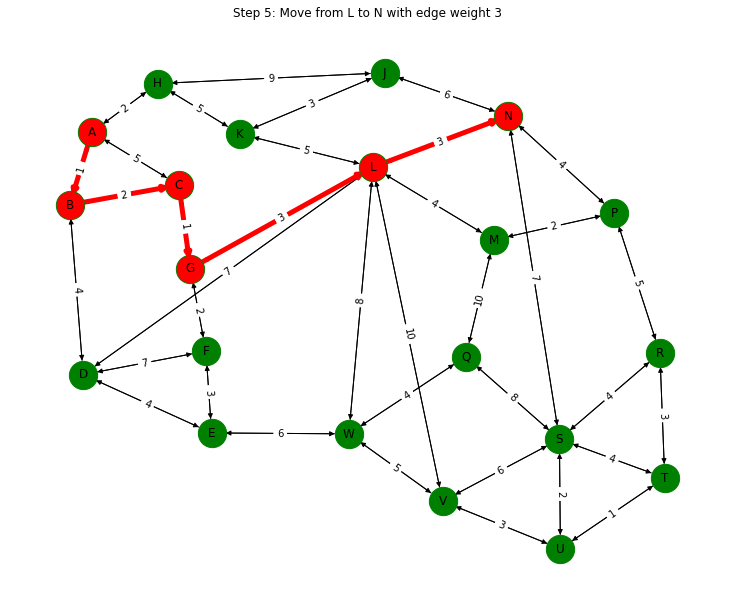

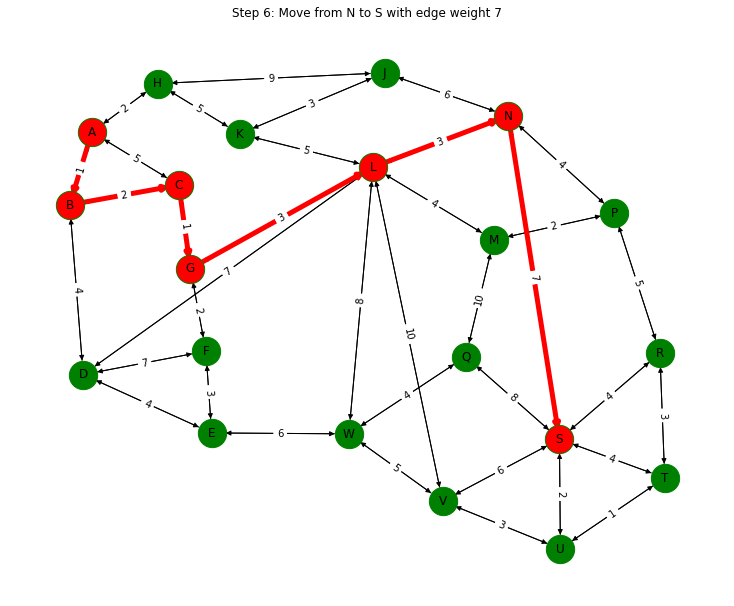


Total distance from A to S: 17
Shortest path: A -> B -> C -> G -> L -> N -> S


In [9]:
for i in range(len(path) - 1):
    current_node = path[i]
    next_node = path[i + 1]
    edge_weight = example_graph[current_node][next_node]

    # Size of the plot
    plt.figure(figsize=(10, 8))

    # Draw the graph using the points tuple(x,y)
    nx.draw(Graph, pos=node_positions, with_labels=True, node_size=800, node_color="green", font_size=12)

    # Highlight the chosen node and path
    current_path = path[:i + 2]
    path_edges = [(current_path[j], current_path[j + 1]) for j in range(len(current_path) - 1)]
    nx.draw_networkx_nodes(Graph, pos=node_positions, nodelist=current_path, node_color="red", node_size=700)
    nx.draw_networkx_edges(Graph, pos=node_positions, edgelist=path_edges, edge_color="red", width=5)

    # Display the edge labels
    labels = nx.get_edge_attributes(Graph, 'weight')
    nx.draw_networkx_edge_labels(Graph, pos=node_positions, edge_labels=labels)

    # Title
    plt.title(f"Step {i + 1}: Move from {current_node} to {next_node} with edge weight {edge_weight}")
    plt.show()

# Print the total distance and the final path
print(f"\nTotal distance from {starting_vertex} to {ending_vertex}: {distances[ending_vertex]}")
print(f"Shortest path: {' -> '.join(path)}")

The shortest path from A to S based on the given graph:


1. **Initialization:**
- The algorithm starts at vertex A with a current smallest distance of 0.
- Vertices B, C, and H are adjacent to A, and their distances are updated to 1, 5, and 2, respectively.

2. **Exploring Neighbors of B:**
- We're at vertex B, removing it from the queue.
- The current shortest path to A is still 1.
- Checking B to A: Is 2 shorter? No, still 1.
- Checking B to C: Is 3 shorter? Yes, add to the queue.
- Checking B to D: Is 5 shorter? Yes, add to the queue.
  

3. **Exploring Neighbors of H:**
- At vertex H, taken off the queue.
- The current shortest path to A is 2.
- Checking H to A: Is 4 shorter? No, it's still 2.
- Checking H to J: Is 11 shorter? Yes, add to the queue.
- Checking H to K: Is 7 shorter? Yes, add to the queue.

4. **Exploring Neighbors of C:**
- At vertex C, taken off the queue.
- The current shortest path to A is 3.
- Checking C to A: Is 8 shorter? No, still 3.
- Checking C to B: Is 5 shorter? No, still 3.
- Checking C to G: Is 4 shorter? Yes, add to the queue.

5. **Exploring Neighbors of G:**
- At vertex G, taken off the queue.
- The current shortest path to A is 4.
- Checking G to C: Is 5 shorter? No, still 4.
- Checking G to F: Is 6 shorter? Yes, add to the queue.
- Checking G to L: Is 7 shorter? Yes, add to the queue.

**

6. **Exploring Neighbors of D:**
- At vertex D, taken off the queue.
- The current shortest path to A is 5.
- Checking D to B: Is 9 shorter? No, still 5.
- Checking D to E: Is 9 shorter? Yes, add to the queue!
- Checking D to F: Is 12 shorter? No, still 5.

7. **Exploring Neighbors of F:**
- At vertex F, taken off the queue.
- The current shortest path to A is 6.
- Checking F to D: Is 13 shorter? No, still 6.
- Checking F to E: Is 9 shorter? No, still 6.
- Checking F to G: Is 8 shorter? No, still 6.

8. **Exploring Neighbors of K:**
- At vertex K, taken off the queue.
- The current shortest path to A is 7.
- Checking K to H: Is 12 shorter? No, still 7.
- Checking K to J: Is 10 shorter? Yes, add to the queue!
- Checking K to L: Is 12 shorter? No, still 7.


9. **Exploring Neighbors of L:**
- At vertex L, removed from the queue.
- The current shortest path to A is 7.
- Checking L to D: Is 14 shorter? No, still 7.
- Checking L to G: Is 10 shorter? No, still 7.
- Checking L to K: Is 12 shorter? No, still 7.
- Checking L to M: Is 11 shorter? Yes, add to the queue!
- Checking L to N: Is 10 shorter? Yes, add to the queue!
- Checking L to V: Is 17 shorter? Yes, add to the queue!
- Checking L to W: Is 15 shorter? Yes, add to the queue!


10. **Exploring Neighbors of E:**
- At vertex E, removed from the queue.
- The current shortest path to A is 9.
- Checking E to D: Is 13 shorter? No, still 9.
- Checking E to F: Is 12 shorter? No, still 9.
- Checking E to W: Is 15 shorter? No, still 9.


11. **Exploring Neighbors of N:**
- At vertex N, removed from the queue.
- The current shortest path to A is 10.
- Checking N to J: Is 16 shorter? No, still 10.
- Checking N to L: Is 13 shorter? No, still 10.
- Checking N to P: Is 14 shorter? Yes, add to the queue!
- Checking N to S: Is 17 shorter? Yes, add to the queue!


12. **Exploring Neighbors of J:**
- At vertex J, removed from the queue.


13. **Exploring Neighbors of M:**
- At vertex M, removed from the queue.
- The current shortest path to A is 11.
- Checking M to L: Is 15 shorter? No, still 11.
- Checking M to P: Is 13 shorter? Yes, add to the queue!
- Checking M to Q: Is 21 shorter? Yes, add to the queue!


14. **Exploring Neighbors of P:**
- At vertex P, removed from the queue.
- The current shortest path to A is 13.
- Checking P to M: Is 15 shorter? No, still 13.
- Checking P to N: Is 17 shorter? No, still 13.
- Checking P to R: Is 18 shorter? Yes, add to the queue!


15. **Exploring Neighbors of W:**
- At vertex W, removed from the queue.
- The current shortest path to A is 15.
- Checking W to E: Is 21 shorter? No, still 15.
- Checking W to L: Is 23 shorter? No, still 15.
- Checking W to Q: Is 19 shorter? Yes, add to the queue!
- Checking W to V: Is 20 shorter? No, still 15.


16. **Exploring Neighbors of S:**
- At vertex S, removed from the queue.
- The current shortest path to A is 17.
- Checking S to N: Is 24 shorter? No, still 17.
- Checking S to Q: Is 25 shorter? No, still 17.
- Checking S to R: Is 21 shorter? No, still 17.
- Checking S to T: Is 21 shorter? Yes, add to the queue!
- Checking S to U: Is 19 shorter? Yes, add to the queue!
- Checking S to V: Is 23 shorter? No, still 17.


17. **Exploring Neighbors of V:**

- At vertex V, removed from the queue.
- The current shortest path to A is 17.
- Checking V to L: Is 27 shorter? No, still 17.
- Checking V to S: Is 23 shorter? No, still 17.
- Checking V to U: Is 20 shorter? No, still 17.
- Checking V to W: Is 22 shorter? No, still 17.


18. **Exploring Neighbors of R:**
- At vertex R, removed from the queue.
- The current shortest path to A is 18.
- Checking R to P: Is 23 shorter? No, still 18.
- Checking R to S: Is 22 shorter? No, still 18.
- Checking R to T: Is 21 shorter? No, still 18.
  

19. **Exploring Neighbors of Q:**

- At vertex Q, removed from the queue.
- The current shortest path to A is 19.
- Checking Q to M: Is 29 shorter? No, still 19.
- Checking Q to S: Is 27 shorter? No, still 19.
- Checking Q to W: Is 23 shorter? No, still 19.
  

20. **Exploring Neighbors of U:**
- At vertex U, removed from the queue.
- The current shortest path to A is 19.
- Checking U to S: Is 21 shorter? No, still 19.
- Checking U to T: Is 20 shorter? Yes, add to the queue!
- Checking U to V: Is 22 shorter? No, still 19.


21. **Exploring Neighbors of T:**

- At vertex T, removed from the queue.
- The current shortest path to A is 20.
- Checking T to R: Is 23 shorter? No, still 20.
- Checking T to S: Is 24 shorter? No, still 20.
- Checking T to U: Is 21 shorter? No, still 20.

The shortest paths starting from A to each vertex is:

- From A to B - A,B = 1
- From A to C - A,B,C = 3
- From A to D - A,B,D = 5
- From A to E - A,B,D,E = 9
- From A to F - A,B,C,G,F = 6
- From A to G - A,B,C,G = 4
- From A to H - A,H = 2
- From A to J - A,H,K,J = 10
- From A to K - A,H,K = 7
- From A to L - A,B,C,G,L = 7
- From A to M - A,B,C,G,L,M = 11
- From A to N - A,B,C,G,L,N = 10
- From A to P - A,B,C,G,L,M,P = 13
- From A to Q - A,B,C,G,L,W,Q = 19
- From A to R - A,B,C,G,L,M,P,R = 18
- From A to S - A,B,C,G,L,N,S = 17
- From A to T - A,B,C,G,L,N,S,U,T = 20
- From A to U - A,B,C,G,L,N,S,U = 19
- From A to V - A,B,C,G,L,V = 17
- From A to W - A,B,C,G,L,W = 15


   


The Euclidean distance is a measure of the straight-line distance between two points in Euclidean space. For two-dimensional coordinates `(x1,y1)` and `(x2,y2)`, the Euclidean distance d is calculated using the formula:

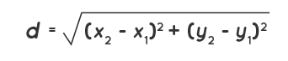

The code below, `coord1` and `coord2` are tuples representing two-dimensional coordinates. The function uses the square root of the sum of the squared differences in the `x` and `y` coordinates to calculate the Euclidean distance between the points.

The distances were then normalized based on the maximum distance to create proportional values.


In [10]:
import math

def euclidean_distance(coord1, coord2):
    return math.sqrt((coord1[0] - coord2[0]) ** 2 + (coord1[1] - coord2[1]) ** 2)

def normalize_coordinates(coordinates):
    reference_coord = coordinates['A']  # You can choose any reference point
    distances = {
        key: euclidean_distance(reference_coord, coord)
        for key, coord in coordinates.items()
    }

    max_distance = max(distances.values())
    normalized_values = {
        key: distance / max_distance
        for key, distance in distances.items()
    }

    return normalized_values

# Coordinates
coordinates = {
    'A': (89, -101),
    'B': (66, -182),
    'C': (179, -160),
    'D': (80, -371),
    'E': (213, -436),
    'F': (207, -345),
    'G': (191, -253),
    'H': (157, -47),
    'J': (392, -35),
    'K': (242, -103),
    'L': (380, -140),
    'M': (505, -221),
    'N': (520, -83),
    'P': (630, -191),
    'Q': (476, -351),
    'R': (677, -347),
    'S': (573, -443),
    'T': (682, -486),
    'U': (574, -565),
    'V': (452, -512),
    'W': (355, -437),
}

# Normalize coordinates based on distance
normalized_values = normalize_coordinates(coordinates)

# Print the normalized values
for key, normalized_value in normalized_values.items():
    print(f'{key}: {normalized_value}')

A: 0.0
B: 0.11909481206464746
C: 0.15220984953428737
D: 0.38209788234889147
E: 0.505238881237809
F: 0.3833497530615605
G: 0.25890711131380073
H: 0.12281612727114345
J: 0.4386097119043341
K: 0.21642043139774916
L: 0.41526793369956133
M: 0.6123777442383197
N: 0.6101342561110964
P: 0.7757020251586446
Q: 0.651647919157774
R: 0.9015125105350874
S: 0.8382225596457028
T: 1.0
U: 0.949351947287303
V: 0.775584673623494
W: 0.6061324805182055


After generate the heuristics values I stored them to be used in the piece of code more below

In [11]:
heuristic_values = {
    'A': 0.0,
    'B': 0.11909481206464746,
    'C': 0.15220984953428737,
    'D': 0.38209788234889147,
    'E': 0.505238881237809,
    'F': 0.3833497530615605,
    'G': 0.25890711131380073,
    'H': 0.12281612727114345,
    'J': 0.4386097119043341,
    'K': 0.21642043139774916,
    'L': 0.41526793369956133,
    'M': 0.6123777442383197,
    'N': 0.6101342561110964,
    'P': 0.7757020251586446,
    'Q': 0.651647919157774,
    'R': 0.9015125105350874,
    'S': 0.8382225596457028,
    'T': 1.0,
    'U': 0.949351947287303,
    'V': 0.775584673623494,
    'W': 0.6061324805182055
}

The edges of the graph below remain the same values. The type of the graph was changed to list of tuples, as the first one used on the Dijkstra algorithm was a nested dictionary.

In [12]:
graph = {
    'A': [('B', 1), ('C', 5), ('H', 2)],
    'B': [('A', 1), ('C', 2), ('D', 4)],
    'C': [('A', 5), ('B', 2), ('G', 1)],
    'D': [('B', 4), ('L', 7), ('F', 7), ('E', 4)],
    'E': [('D', 4), ('F', 3), ('W', 6)],
    'F': [('D', 7), ('E', 3), ('G', 2)],
    'G': [('F', 2), ('C', 1), ('L', 3)],
    'H': [('A', 2), ('K', 5), ('J', 9)],
    'J': [('H', 9), ('K', 3), ('N', 6)],
    'K': [('H', 5), ('J', 3), ('L', 5)],
    'L': [('K', 5), ('N', 3), ('G', 3), ('D', 7), ('W', 8), ('V', 10), ('M', 4)],
    'M': [('L', 4), ('Q', 10), ('P', 2)],
    'N': [('J', 6), ('L', 3), ('S', 7), ('P', 4)],
    'P': [('N', 4), ('M', 2), ('R', 5)],
    'Q': [('M', 10), ('W', 4), ('S', 8)],
    'R': [('P', 5), ('S', 4), ('T', 3)],
    'S': [('N', 7), ('Q', 8), ('R', 4), ('V', 6), ('U', 2), ('T', 4)],
    'T': [('R', 3), ('S', 4), ('U', 1)],
    'U': [('T', 1), ('S', 2), ('V', 3)],
    'V': [('U', 3), ('S', 6), ('L', 10), ('W', 5)],
    'W': [('E', 6), ('L', 8), ('Q', 4), ('V', 5)],
}

Now, the A* algorithm is almost identical as the dijkastra, with just few differences that in certain cases become a huge difference. The main difference is the addition of the parameter `heuristic_value` in the function used to find the shortest path. In this specific case, you will see in the results, that the shortest path still the same of the one found by Dijkstra earlier.

Despite of the fact that the shortest path remained the same, the A* algorithm is much faster and useful in terms of reliability of the code. The reason why is that Dijkstra goes through every path until find the shortest, while A* uses the heuristics values to decide where to go, knowing that the path chose is the better one. 

In [13]:
start_time_astar = time.time() 
def astar(graph, start, goal, heuristic_values):
       
 
    open_set = [(0, start)]
    closed_set = set()
    g_values = {node: float('inf') for node in graph}
    g_values[start] = 0
    came_from = {node: None for node in graph}

    while open_set:
        current_cost, current_node = heapq.heappop(open_set)

        if current_node == goal:
            # Reconstruct the path
            path = []
            while current_node is not None:
                path.insert(0, current_node)
                current_node = came_from[current_node]
            return path

        closed_set.add(current_node)

        for neighbor, cost in graph[current_node]:
            if neighbor in closed_set:
                continue

            tentative_g = g_values[current_node] + cost
            if tentative_g < g_values[neighbor]:
                g_values[neighbor] = tentative_g
                f_value = tentative_g + heuristic_values[neighbor]
                heapq.heappush(open_set, (f_value, neighbor))
                came_from[neighbor] = current_node
                
    
    return None


# Example usage:
start_node = 'A'
goal_node = 'S'
shortest_path = astar(graph, start_node, goal_node, heuristic_values)

if shortest_path:
    print(f"Shortest path from {start_node} to {goal_node}: {shortest_path}")
else:
    print(f"No path found from {start_node} to {goal_node}")
    

end_time_astar = time.time()

Shortest path from A to S: ['A', 'B', 'C', 'G', 'L', 'N', 'S']


The piece of code has some differences compared to Dijkstra and starts for the parameter `heuristic_values` added to the function.

After initialize `g_values` with inifities for all nodes, it takes the start node as zero and start a while loop to check the each node plus the cost (which is the `heuristic_values`) in order to find the shortest path.

In [14]:
distances_dijkstra, path_dijkstra = calculate_distances(example_graph, starting_vertex, ending_vertex)
execution_time_dijkstra = end_time_dijkstra - start_time_dijkstra
print(f"\nDijkstra's algorithm execution time: {execution_time_dijkstra} seconds")

# Measure time for A* algorithm
shortest_path_astar = astar(graph, start_node, goal_node, heuristic_values)
execution_time_astar = end_time_astar - start_time_astar
print(f"A* algorithm execution time: {execution_time_astar} seconds")





Dijkstra's algorithm execution time: 0.0 seconds
A* algorithm execution time: 0.0 seconds


In [15]:
%timeit calculate_distances

22.9 ns ± 0.47 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [16]:
%timeit astar

34.1 ns ± 4.08 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


To compare the efficiency of different algorithms, the `time` library was imported. Each algorithm was encapsulated within a function, allowing for precise timing. The process involved recording the start and end points, followed by subtracting them to obtain the final execution time in seconds.

Additionally, the `timeit` library was introduced to validate the experiment.

Although specific details regarding the number of test iterations and corresponding values were not documented, it became evident after approximately 30 runs that the A* algorithm consistently outperformed Dijkstra's algorithm in terms of runtime.

This approach ensured a systematic evaluation of the algorithms, and the use of both `time` and `timeit` libraries provided a robust confirmation of the observed performance differences.

Find below one of the many time spent results of each algorithm. Notice that the A* algorith runs faster than the Dijkstra. 

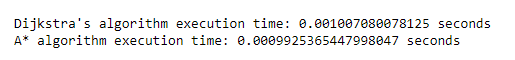

# References 


Dijkhuizen, B. (2022). Dijkstra’s Algorithm Explained Using a Python Implementation. [online] Medium. Available at: https://bryandijkh.medium.com/dijkstras-algorithm-explained-using-a-python-implementation-a514a9d31076 [Accessed 19 Nov. 2023].

Shute, M. (2019). Dijkstra’s Shortest Path Algorithm in Python. [online] Medium. Available at: https://www.cantorsparadise.com/dijkstras-shortest-path-algorithm-in-python-d955744c7064 [Accessed 19 Nov. 2023].

Python documentation. (n.d.). time — Time access and conversions. [online] Available at: https://docs.python.org/3/library/time.html?highlight=time#module-time [Accessed 19 Nov. 2023].

docs.python.org. (n.d.). timeit — Measure execution time of small code snippets — Python 3.9.0 documentation. [online] Available at: https://docs.python.org/3/library/timeit.html [Accessed 19 Nov. 2023].

Matthes, K. (2020). Pathfinding: A* Search Algorithm - Karl Matthes - Medium. [online] Medium. Available at: https://karlmatthes.medium.com/pathfinding-a-search-algorithm-d77400c89888 [Accessed 19 Nov. 2023].

Tracyrenee (2023). Software Review: Python’s NetworkX library. [online] Medium. Available at: https://medium.com/@tracyrenee61/software-review-pythons-networkx-library-813eab167bb6 [Accessed 19 Nov. 2023].

Tracyrenee (2023). Use NetworkX to make predictions on nodes in Python. [online] MLearning.ai. Available at: https://medium.com/mlearning-ai/use-networkx-to-make-predictions-on-nodes-in-python-624d1d86b471 [Accessed 19 Nov. 2023].

networkx.org. (n.d.). DiGraph—Directed graphs with self loops — NetworkX 2.8.7 documentation. [online] Available at: https://networkx.org/documentation/stable/reference/classes/digraph.html [Accessed 19 Nov. 2023].

networkx.org. (n.d.). draw — NetworkX 3.2.1 documentation. [online] Available at:https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html [Accessed 19 Nov. 2023].

networkx.org. (n.d.). draw_networkx_edges — NetworkX 3.2.1 documentation. [online] Available at: https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edges.html [Accessed 19 Nov. 2023].

networkx.org. (n.d.). draw_networkx_nodes — NetworkX 3.2.1 documentation. [online] Available at: https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html [Accessed 19 Nov. 2023].

Tech Differences. (2018). Difference Between Tree and Graph (with Comparison chart). [online] Available at: https://techdifferences.com/difference-between-tree-and-graph.html [Accessed 19 Nov. 2023].

Tracyrenee (2023). Software Review: Python’s NetworkX library. [online] Medium. Available at: https://tracyrenee61.medium.com/software-review-pythons-networkx-library-813eab167bb6 [Accessed 19 Nov. 2023].

Cuemath. (n.d.). Euclidean Distance Formula - Derivation, Examples. [online] Available at: https://www.cuemath.com/euclidean-distance-formula/ [Accessed 19 Nov. 2023].

www.xomnia.com. (n.d.). Graph theory and its uses with 5 examples of real life problems. [online] Available at: https://www.xomnia.com/post/graph-theory-and-its-uses-with-examples-of-real-life-problems/ [Accessed 19 Nov. 2023].